In [1]:
### obtendo pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [2]:
### função para interagir com API do bacen

def bcb(codigo) :
    link = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    df = pd.read_json(link)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [3]:
### puxando dados da inflação

ipca = bcb(13522)

In [4]:
### puxando dados do desemprego

base = pd.read_excel(r'C:\Users\Pichau\Desktop\txdesemprego.xlsx', index_col = 0, header = 0)

In [5]:
### obtendo variação da inflação de 12 em 12 meses

base['IPCA'] = (ipca / ipca.shift(12)) - 1

base = base.dropna()

In [6]:
### organizando dados em variáveis

y = base['Taxa de desemprego']
x = base['IPCA']

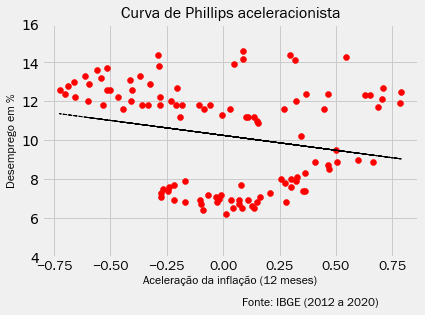

In [7]:
### plotando gráfico

plt.scatter(x, y, color = 'red')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color = 'black', linewidth=1, linestyle = 'dashed')
plt.ylabel('Desemprego em %', fontsize = 12, fontname = 'Franklin Gothic Book')
plt.xlabel('Aceleração da inflação (12 meses)', fontsize = 12, fontname = 'Franklin Gothic Book')
plt.title('Curva de Phillips aceleracionista', fontsize = 16, fontname = 'Franklin Gothic Book')
plt.ylim(4, 16)
plt.xticks(fontname = 'Franklin Gothic Book')
plt.figtext(0.7, -0.1, "Fonte: IBGE (2012 a 2020)", ha="center", fontsize=12, fontname = 'Franklin Gothic Book')
plt.show()

In [8]:
### análise de regressão (mínimos quadrados)

X_sm = sm.add_constant(x)
results = sm.OLS(y, X_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Taxa de desemprego   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.546
Date:                Wed, 19 May 2021   Prob (F-statistic):             0.0204
Time:                        20:39:27   Log-Likelihood:                -254.40
No. Observations:                 108   AIC:                             512.8
Df Residuals:                     106   BIC:                             518.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2496      0.248     41.359      0.000       9.758      10.741
IPCA          -1.5337      0.651     -2.355      0.020      -2.825      -0.243
==============================================================================
Omnibus:                       62.781   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.833
Skew:                          -0.111   Prob(JB):                       0.0199
Kurtosis:                       1.700   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Os dados mostram resultados não robustos. 